## Loading up the data
Let's load up the data for the 2011 season.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import seaborn as sns
import matplotlib.pyplot as plt

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/mlb11.csv'
url_content = requests.get(df_url, verify=False).content
mlb11 = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [3]:
mlb11.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


## Task 1
What type of plot would you use to display the relationship between runs and one of the other numerical variables? Plot this relationship using the variable at_bats as the predictor. Does the relationship look linear? If you knew a team's at_bats, would you be comfortable using a linear model to predict the number of runs?
If the relationship looks linear, we can quantify the strength of the relationship with the correlation coefficient.

The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. Its values can range from -1 to 1. A correlation coefficient of -1 describes a perfect negative, or inverse, correlation, with values in one series rising as those in the other decline, and vice versa. A coefficient of 1 shows a perfect positive correlation, or a direct relationship. A correlation coefficient of 0 means there is no linear relationship. 

In [4]:
# summarize
from numpy import mean
from numpy import std

print('data1: mean=%.3f stdv=%.3f' % (mean(mlb11['runs']), std(mlb11['runs'])))
print('data2: mean=%.3f stdv=%.3f' % (mean(mlb11['at_bats']), std(mlb11['at_bats'])))

data1: mean=693.600 stdv=81.093
data2: mean=5523.500 stdv=78.531


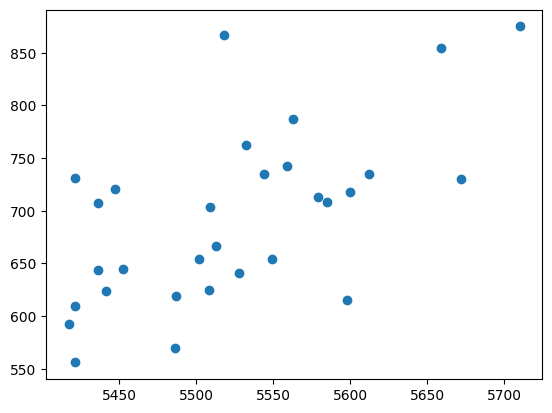

In [7]:
plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.show()

In [6]:
import statsmodels.api as sm

formula_string = "runs ~ at_bats"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted = model.fit()

print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     16.65
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           0.000339
Time:                        20:00:41   Log-Likelihood:                -167.44
No. Observations:                  30   AIC:                             338.9
Df Residuals:                      28   BIC:                             341.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2789.2429    853.696     -3.267      0.0

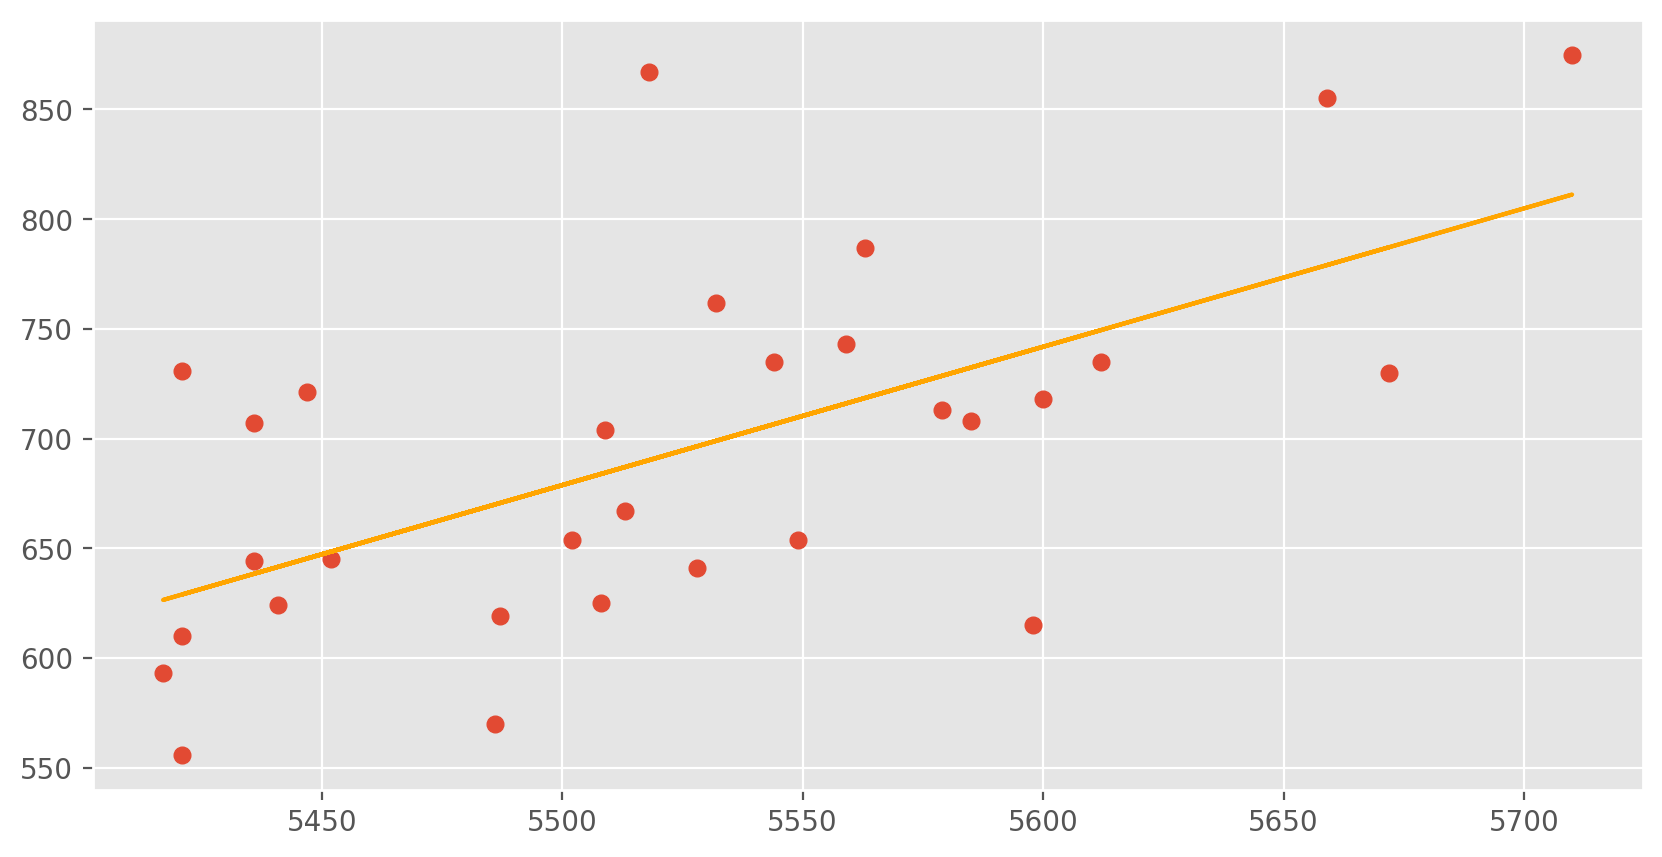

In [32]:
x = mlb11['at_bats']
y = mlb11['runs']

y_pred = model_fitted.predict(x)

plt.scatter(mlb11['at_bats'], mlb11['runs'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

## Task 2
Looking at your plot from the previous exercise, describe the relationship between these two variables. Make sure to discuss the form, direction, and strength of the relationship as well as any unusual observations. 

The relationship between the two variables in Linear. 
The direction is positive
The strength is moderate as seen from the correlation 

In [18]:
mlb11['runs'].corr(mlb11['at_bats'])

0.6106270467206687

## Task 3
Fit a new model that uses homeruns to predict runs. Using the estimates from the Python output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs? 

In [19]:
formula_string = "runs ~ homeruns"

model = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted_2 = model.fit()

print(model_fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Wed, 27 Mar 2024   Prob (F-statistic):           1.90e-07
Time:                        17:07:23   Log-Likelihood:                -159.66
No. Observations:                  30   AIC:                             323.3
Df Residuals:                      28   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.2389     41.678      9.963      0.0

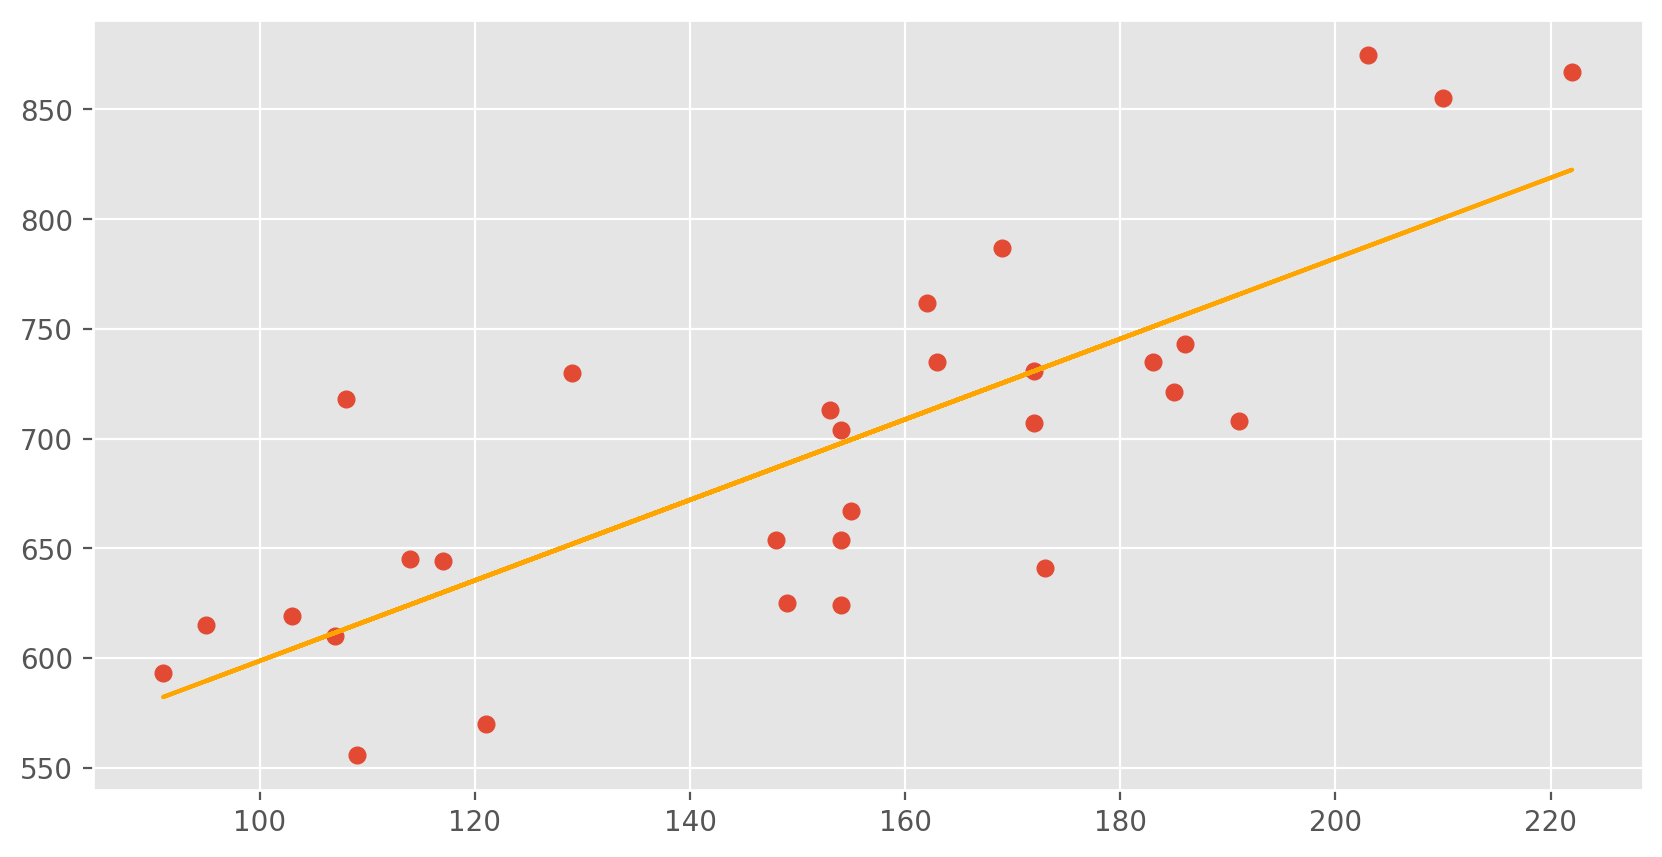

In [20]:
x = mlb11['homeruns']
y = mlb11['runs']

y_pred_2 = model_fitted_2.predict(x)

plt.scatter(mlb11['homeruns'], mlb11['runs'])
plt.plot(x, y_pred_2, color = 'orange')
plt.show();

In [21]:
print(f"Equation of the regression line is mx + b = {model_fitted_2.params[0]} + {model_fitted_2.params[1]} * homeruns")

Equation of the regression line is mx + b = 415.23888491572285 + 1.834541619623971 * homeruns


The slope indicates how much the number of runs is expected to increase (or decrease if the slope is negative) for each additional home run hit by the team.
If the slope is positive, it suggests that there is a positive relationship between home runs and runs scored, meaning that as the number of home runs increases, the number of runs scored by the team is also expected to increase. A larger positive slope indicates a stronger positive relationship, implying that home runs have a greater impact on the team's success in terms of scoring runs.
On the other hand, if the slope is negative, it suggests a negative relationship, meaning that as the number of home runs increases, the number of runs scored decreases. 


## Task 4
If a team manager saw the least squares regression line and not the actual data, how many runs would he or she predict for a team with 5,578 at-bats? Is this an overestimate or an underestimate, and by how much? In other words, what is the residual for this prediction? 

In [26]:
print(f"For a team with 5578 at_bats, the manager can predict that the runs would be = mx + b = {(0.6305 * 5578) + (-2789.2429)} ")

print(f"From the actual dataset, we see a Philadelphia Phillies with at_bats of	5579 having runs of 713. However, our model predicts a value of 728 which is an overestimate by {728 - 713}")

For a team with 5578 at_bats, the manager can predict that the runs would be = mx + b = 727.6860999999994 
From the actual dataset, we see a Philadelphia Phillies with at_bats of	5579 having runs of 713. However, our model predicts a value of 728 which is an overestimate by 15


## Task 5
Is there any apparent pattern in the residuals plot? What does this indicate about the linearity of the relationship between runs and at-bats?

### Residual Plot

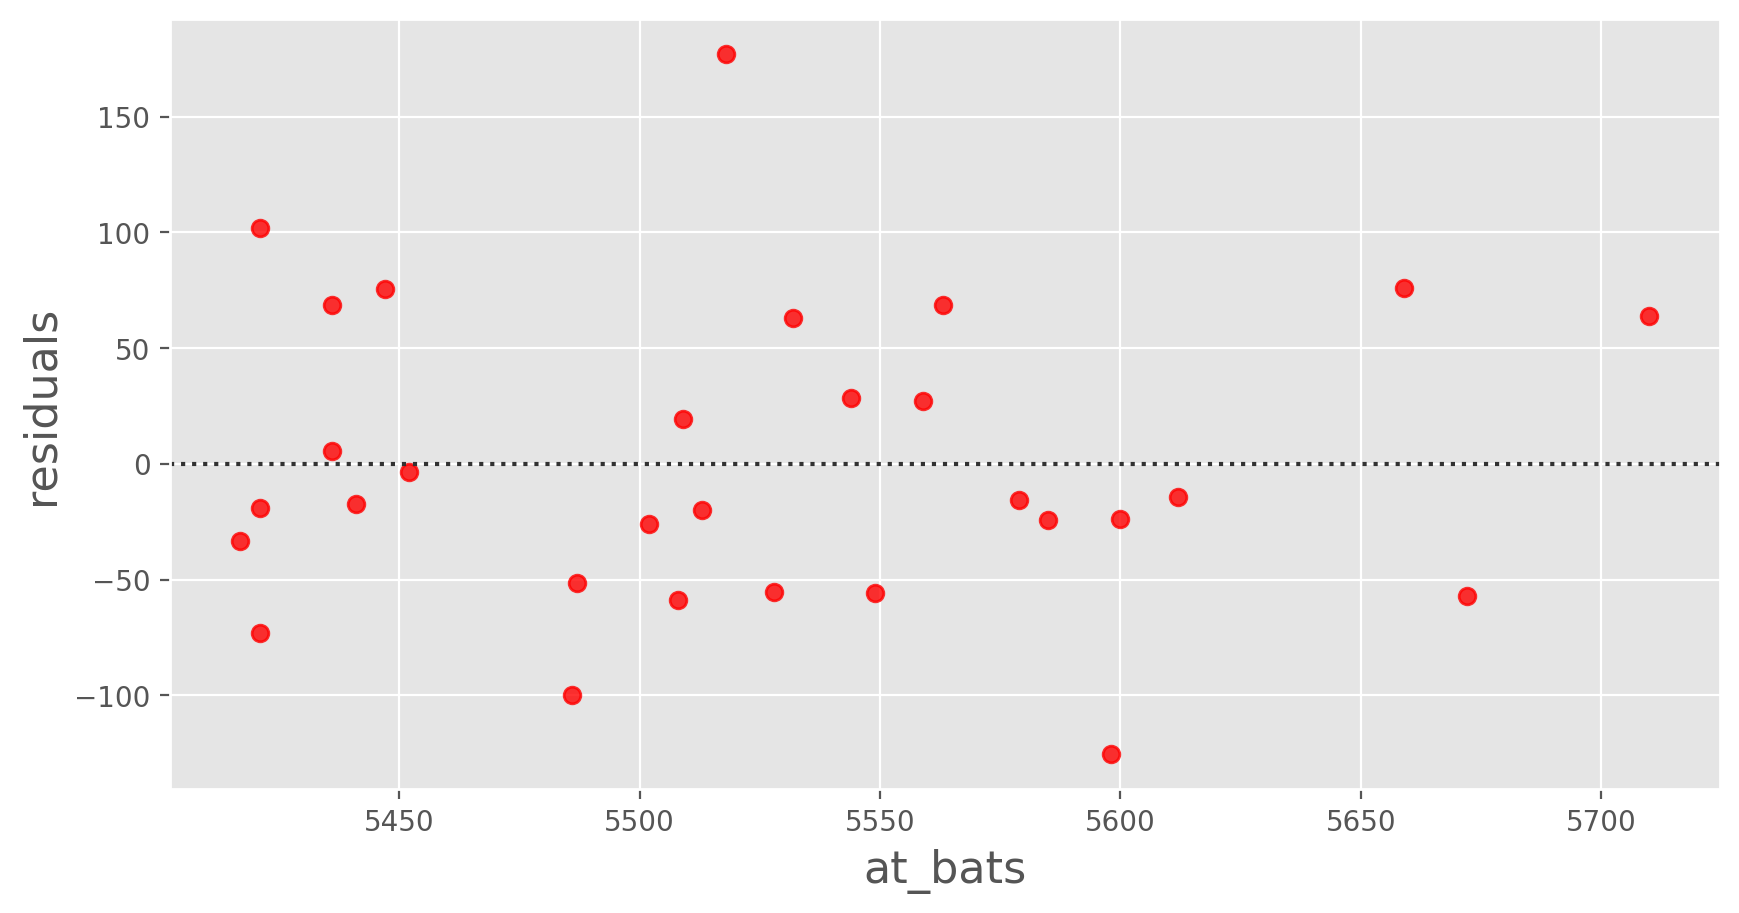

In [30]:
x = mlb11['at_bats']
y = mlb11['runs']
data = pd.concat([mlb11['at_bats'], mlb11['runs']], axis=1)

sns.residplot(x='at_bats', y='runs', data=data, color = 'red')
plt.xlabel('at_bats', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

A good residual plot shows a random scatter of points forming an approximately constant width band around the identity line. In our case, the residual plot shows a random scatter of points forming an approximately constant width band around the identity line which implies that it is a good residual. This indicates that the at_bats variable can be used to predict the runs values to an extent.

## More proof of linearity below

## Task 6: 
Based on the histogram and the normal probability plot, does the nearly normal residuals condition appear to be met?

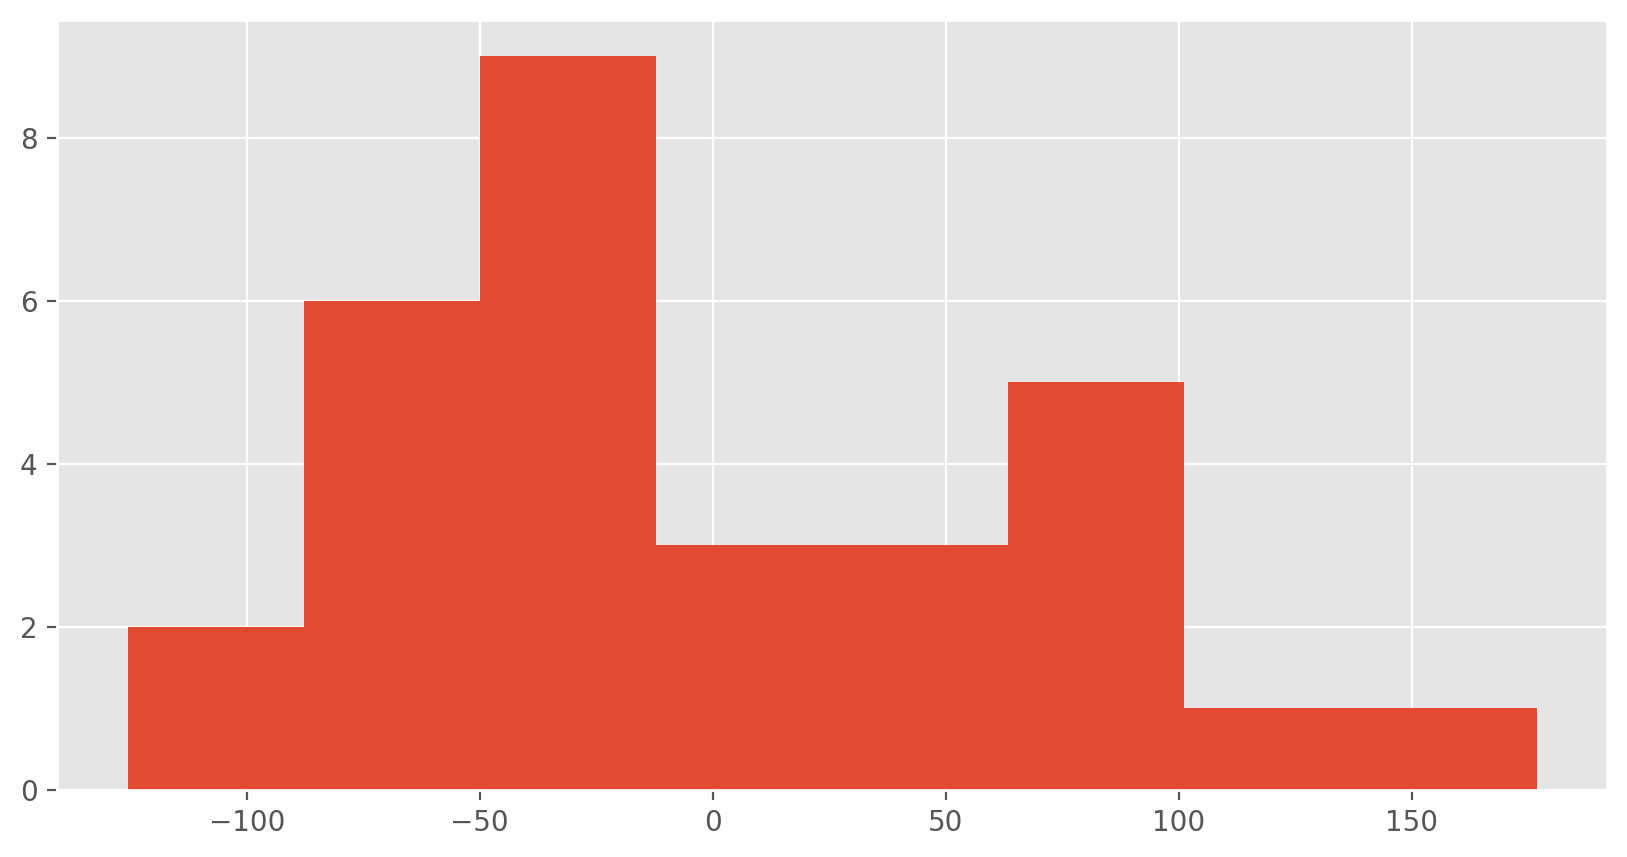

In [33]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

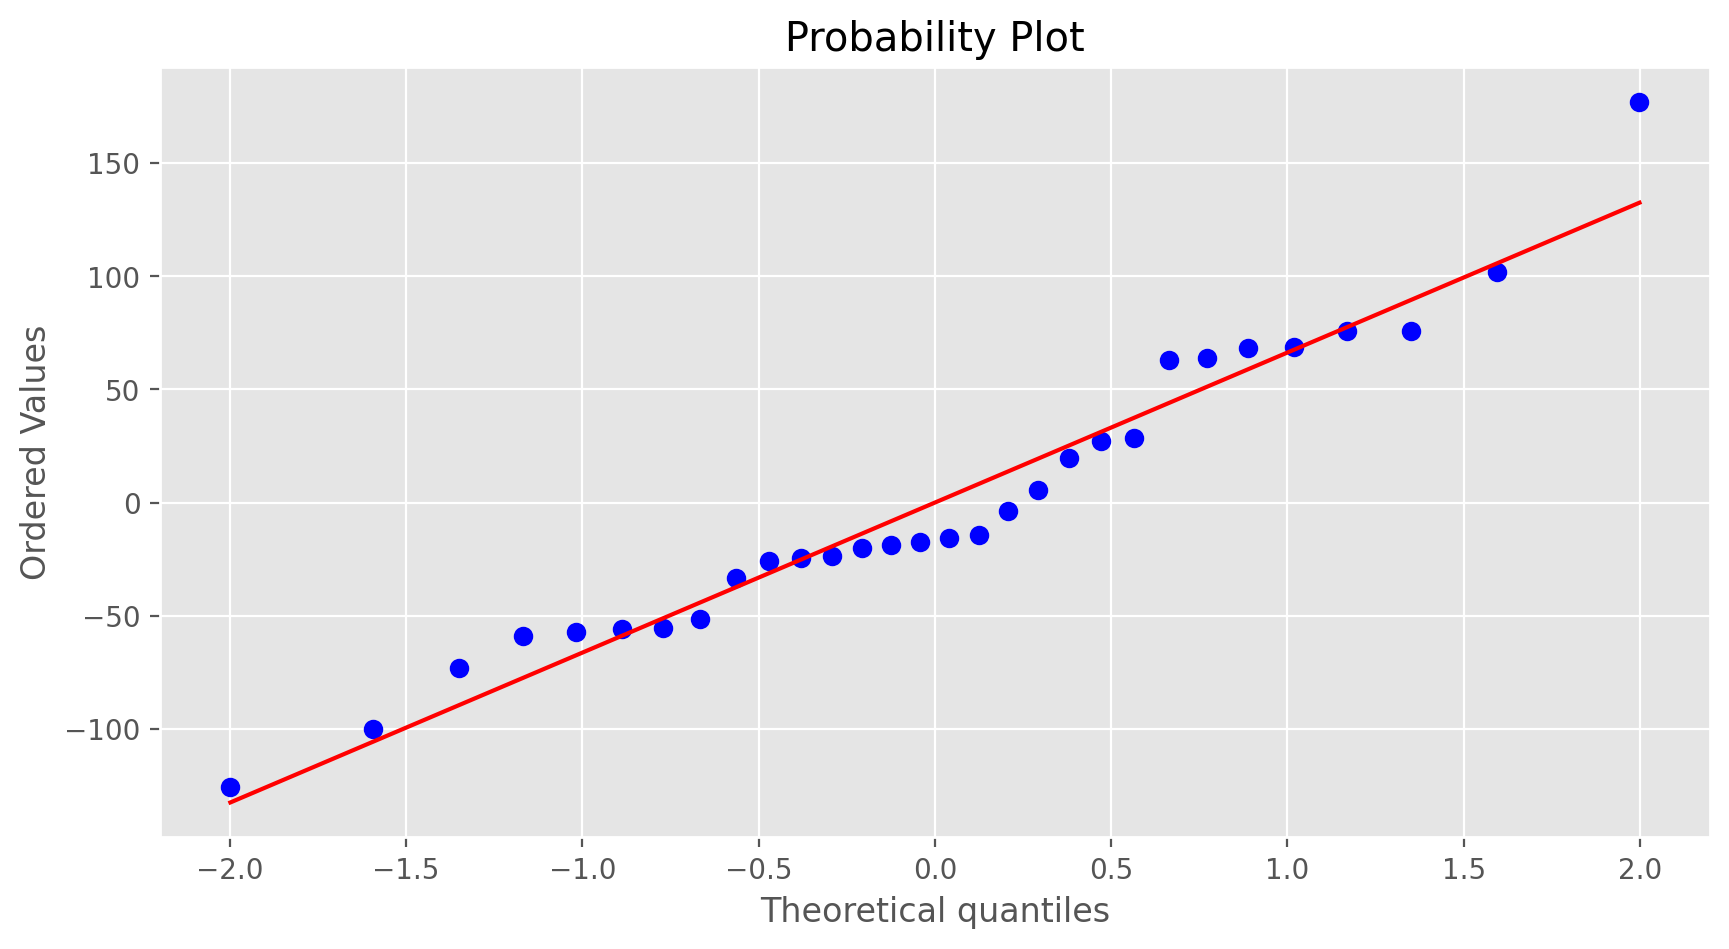

In [34]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

Yes, based on the histogram and the normal distribution plot, the normal residuals conditions appear to be met. It passes the normality test.

## Task 7: 
Based on the plot in (1), does the constant variability condition appear to be met?

In [38]:
mlb11['runs'].corr(mlb11['at_bats'])

0.6106270467206687

Yes. Based on the plot in (1), we see a moderate correlation between runs and at_bats which indicates that the constant variability condition is met. 

## Task 8: Choose another traditional variable from mlb11 that you think might be a good predictor of runs. Produce a scatterplot of the two variables and fit a linear model. At a glance, does there seem to be a linear relationship?

#### Let's use hits

In [8]:
mlb11.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


#### Scatterplot

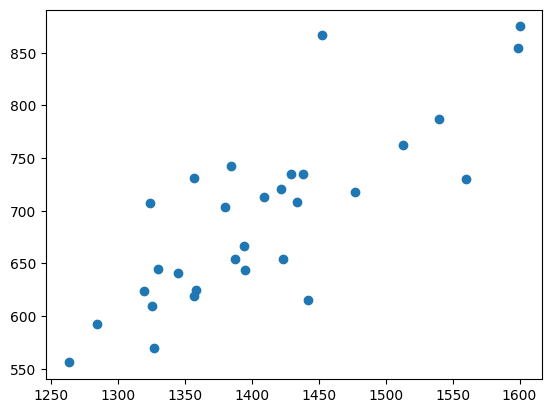

In [9]:
plt.scatter(mlb11['hits'], mlb11['runs'])
plt.show()

#### fitting a linear model

In [10]:
import statsmodels.api as sm

formula_string = "runs ~ hits"

model_hits = sm.formula.ols(formula = formula_string, data = mlb11)
model_fitted_hits = model_hits.fit()

print(model_fitted_hits.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.20
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.04e-07
Time:                        20:16:12   Log-Likelihood:                -159.03
No. Observations:                  30   AIC:                             322.1
Df Residuals:                      28   BIC:                             324.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -375.5600    151.181     -2.484      0.0

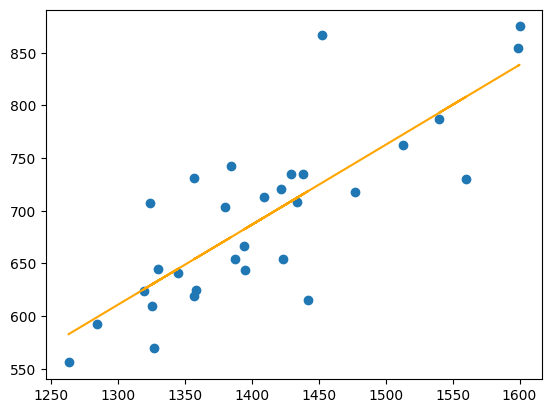

In [11]:
x = mlb11['hits']
y = mlb11['runs']

y_pred_hits = model_fitted_hits.predict(x)

plt.scatter(mlb11['hits'], mlb11['runs'])
plt.plot(x, y_pred_hits, color = 'orange')
plt.show();

#### Residual plot

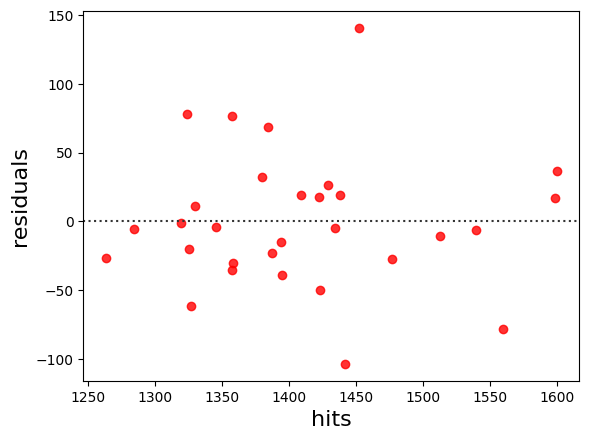

In [12]:
x = mlb11['hits']
y = mlb11['runs']
data = pd.concat([mlb11['hits'], mlb11['runs']], axis=1)

sns.residplot(x='hits', y='runs', data=data, color = 'red')
plt.xlabel('hits', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

#### Correlation coeficcient

In [13]:
mlb11['runs'].corr(mlb11['hits'])

0.8012108132317111

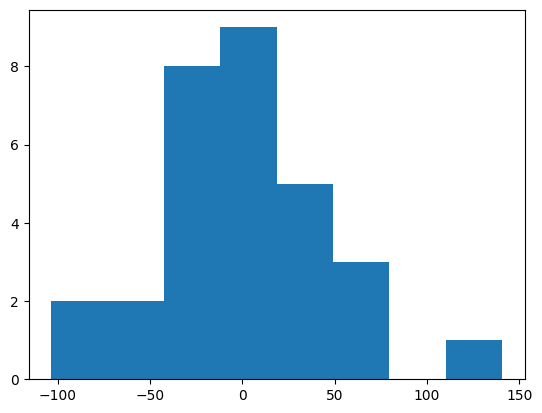

In [15]:
residuals = (y - y_pred_hits)
plt.hist(residuals, bins = 8)
plt.show();

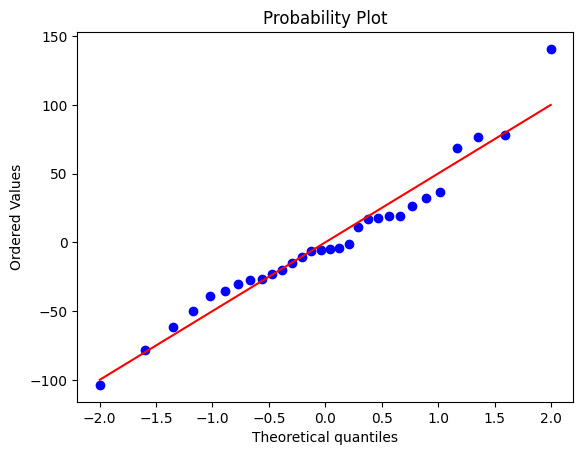

In [16]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

In [17]:
mlb11.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


In [18]:
mlb11['hits'].describe()

count      30.000000
mean     1408.900000
std        87.081947
min      1263.000000
25%      1348.000000
50%      1394.500000
75%      1441.000000
max      1600.000000
Name: hits, dtype: float64

In [19]:
# Taking a random hits like 1539, let's see if hits can be a good predictor of runs
print(model_fitted_hits.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.20
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           1.04e-07
Time:                        20:24:05   Log-Likelihood:                -159.03
No. Observations:                  30   AIC:                             322.1
Df Residuals:                      28   BIC:                             324.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -375.5600    151.181     -2.484      0.0

In [20]:
print(f"mx + b = {(0.7589 * 1539) + (-375.5600)}")

mx + b = 792.3871000000001


In [21]:
print(f"The assumed value of 1539 hits predicted runs value of 792, while actual value of 1540 hits equals 787 runs.")

The assumed value of 1539 hits predicted runs value of 792, while actual value of 1540 hits equals 787 runs.


## Now that you can summarize the linear relationship between two variables, investigate the relationships between runs and each of the other five traditional variables. Which variable best predicts runs? Support your conclusion using the graphical and numerical methods we've discussed (for the sake of conciseness, only include output for the best variable, not all five).